In [99]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from xgboost import XGBRegressor

In [100]:
# Import the dataset

ghg = pd.read_excel("atmosphericemissionsghg.xlsx", index_col = 0, header = 3, 
                    sheet_name = 1, usecols = "C:AH", skiprows = [25])

In [101]:
#Load the data

ghg

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
"Agriculture, forestry and fishing",55231.9,54984.4,54543.9,53737.9,54940.7,54770.8,55696.1,54825.4,54808.8,54703.0,...,46788.9,46521.4,46318.8,48209.8,48144.5,48312.1,48947.5,48416.8,48574.6,46843.2
Mining and quarrying,48693.8,48707.1,49331.3,49142.4,43788.7,45511.6,45808.9,44970.7,43786.3,40140.2,...,23694.3,21941.5,20645.0,20581.5,21937.7,20897.1,20901.9,20698.8,20436.8,18620.3
Manufacturing,180563.3,181614.5,174343.2,168704.3,171407.7,169367.2,170747.2,169529.7,160536.1,144288.0,...,93409.9,89820.1,92374.4,91889.4,89109.4,84379.1,85540.0,84643.4,82996.7,80438.6
"Electricity, gas, steam and air conditioning supply",216597.7,213315.8,201452.1,183993.2,179741.9,177199.8,177054.6,163758.4,169982.1,162476.6,...,163204.4,177660.1,168696.9,147556.8,131352.2,109655.1,99384.8,95162.1,89421.3,80770.4
"Water supply; sewerage, waste management and remediation activities",67701.1,69200.7,69402.1,69615.1,69851.2,70768.0,71303.9,70177.9,71206.3,66836.6,...,30447.3,29329.2,26867.1,25192.8,25056.5,25074.2,26032.8,26177.1,26009.3,24857.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,http://naei.beis.gov.uk/overview/ghg-overview,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning the Dataset

In [102]:
#Select the needed rows

ghg = ghg.iloc[:22]

In [103]:
#Confirm that the selection was done properly

ghg

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
"Agriculture, forestry and fishing",55231.9,54984.4,54543.9,53737.9,54940.7,54770.8,55696.1,54825.4,54808.8,54703.0,...,46788.9,46521.4,46318.8,48209.8,48144.5,48312.1,48947.5,48416.8,48574.6,46843.2
Mining and quarrying,48693.8,48707.1,49331.3,49142.4,43788.7,45511.6,45808.9,44970.7,43786.3,40140.2,...,23694.3,21941.5,20645.0,20581.5,21937.7,20897.1,20901.9,20698.8,20436.8,18620.3
Manufacturing,180563.3,181614.5,174343.2,168704.3,171407.7,169367.2,170747.2,169529.7,160536.1,144288.0,...,93409.9,89820.1,92374.4,91889.4,89109.4,84379.1,85540.0,84643.4,82996.7,80438.6
"Electricity, gas, steam and air conditioning supply",216597.7,213315.8,201452.1,183993.2,179741.9,177199.8,177054.6,163758.4,169982.1,162476.6,...,163204.4,177660.1,168696.9,147556.8,131352.2,109655.1,99384.8,95162.1,89421.3,80770.4
"Water supply; sewerage, waste management and remediation activities",67701.1,69200.7,69402.1,69615.1,69851.2,70768.0,71303.9,70177.9,71206.3,66836.6,...,30447.3,29329.2,26867.1,25192.8,25056.5,25074.2,26032.8,26177.1,26009.3,24857.2
Construction,9441.6,9409.6,9505.4,9622.9,10047.5,10156.6,10430.2,10681.6,10938.8,11198.4,...,11352.6,11963.2,11144.0,11577.9,12566.9,12998.0,13473.2,13668.7,13036.3,11614.6
Wholesale and retail trade; repair of motor vehicles and motorcycles,11724.4,12113.6,11933.0,12179.4,12562.8,12745.3,13070.4,12966.8,13375.4,13920.6,...,16886.9,17193.1,16845.7,16672.5,16801.4,17053.8,16607.5,16080.6,15642.8,13800.9
Transport and storage,65997.8,66529.3,67599.8,68962.5,69959.0,72797.0,78479.7,87546.2,93030.2,91092.2,...,86494.4,82546.5,79602.2,84493.7,86379.4,88947.6,82583.2,87241.9,85748.4,54263.8
Accommodation and food services,2968.7,3401.9,3124.6,3329.8,3317.5,3422.0,3607.3,3220.1,3457.8,3636.2,...,3197.3,3586.5,3669.6,3264.5,3608.7,3700.9,3671.1,3620.9,3663.3,3172.5
Information and communication,1103.6,1181.4,1149.6,1199.8,1240.6,1278.6,1287.4,1224.4,1252.8,1307.1,...,955.7,974.2,927.9,882.6,889.6,910.0,866.9,820.0,819.2,703.7


In [104]:
# decribe the data for more information

ghg.describe()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,...,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,76631.827273,74855.759091,73224.054545,72350.000000,71966.431818,74369.209091,72938.309091,73382.727273,70482.872727,70770.004545,...,57852.509091,59093.477273,57933.772727,55103.181818,54153.572727,52230.818182,50823.840909,50935.927273,49707.259091,43482.681818
std,182267.883123,177710.673396,173503.327192,171440.887734,170332.422360,175958.483413,172334.422468,173331.632007,166373.114290,167322.445299,...,137565.190442,140965.725688,138195.758584,130935.448513,128395.808293,123640.169651,120197.778246,120531.182027,117586.468074,102873.444815
min,45.600000,46.600000,47.700000,50.200000,51.800000,50.500000,51.000000,49.000000,50.500000,60.700000,...,33.500000,32.500000,29.300000,32.400000,29.100000,35.700000,31.200000,31.200000,34.000000,23.200000
25%,1996.950000,1852.475000,1889.200000,1875.950000,1886.050000,1935.400000,1768.200000,1819.300000,1829.875000,1841.600000,...,1220.175000,1296.675000,1278.250000,1182.350000,1222.125000,1252.675000,1223.950000,1192.775000,1200.200000,1053.400000
50%,7738.900000,7960.550000,7861.300000,8025.400000,8039.900000,8240.050000,7718.100000,7498.950000,7360.000000,6993.750000,...,5580.450000,5830.950000,5798.850000,5179.250000,4976.750000,5029.850000,4912.350000,5018.700000,4896.900000,4423.750000
75%,63643.075000,64335.825000,65156.350000,66123.575000,66768.700000,67401.950000,66339.775000,67106.925000,63803.200000,61565.200000,...,42703.500000,42223.350000,41455.875000,42455.550000,42372.500000,42502.625000,43218.825000,42856.875000,42933.275000,41346.700000
max,842950.100000,823413.400000,805464.700000,795850.000000,791630.700000,818061.300000,802321.400000,807210.100000,775311.600000,778470.000000,...,636377.600000,650028.200000,637271.500000,606135.100000,595689.200000,574539.000000,559062.300000,560295.100000,546779.900000,478309.500000


In [105]:
#Transpose the data set for easy usage

ghg = ghg.T
ghg

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade; repair of motor vehicles and motorcycles,Transport and storage,Accommodation and food services,Information and communication,...,"Professional, scientific and technical activities",Administrative and support service activities,Public administration and defence; compulsory social security,Education,Human health and social work activities,"Arts, entertainment and recreation",Other service activities,Activities of households as employers; undifferentiated goods and services-producing activities of households for own use,Consumer expenditure,Total greenhouse gas emissions
1990,55231.9,48693.8,180563.3,216597.7,67701.1,9441.6,11724.4,65997.8,2968.7,1103.6,...,2499.1,2681.5,10854.7,5480.6,5743.7,1641.3,1120.9,45.3,142290.9,833354.6
1991,54984.4,48707.1,181614.5,213315.8,69200.7,9409.6,12113.6,66529.3,3401.9,1181.4,...,2706.9,2824.1,10174.6,5809.0,6068.2,1760.3,1220.1,45.6,150801.4,842950.1
1992,54543.9,49331.3,174343.2,201452.1,69402.1,9505.4,11933.0,67599.8,3124.6,1149.6,...,2612.6,2781.0,10303.2,5921.0,6415.7,1599.1,1160.7,46.6,149160.4,823413.4
1993,53737.9,49142.4,168704.3,183993.2,69615.1,9622.9,12179.4,68962.5,3329.8,1199.8,...,2510.5,2872.7,10512.6,5030.7,6099.7,1682.1,1217.4,47.7,153920.1,805464.7
1994,54940.7,43788.7,171407.7,179741.9,69851.2,10047.5,12562.8,69959.0,3317.5,1240.6,...,2565.8,2965.2,9876.2,4503.7,6174.6,1646.0,1218.2,50.2,148893.1,795850.0
1995,54770.8,45511.6,169367.2,177199.8,70768.0,10156.6,12745.3,72797.0,3422.0,1278.6,...,2644.9,3022.0,9989.2,4205.3,6090.6,1633.1,1243.9,51.8,143596.9,791630.7
1996,55696.1,45808.9,170747.2,177054.6,71303.9,10430.2,13070.4,78479.7,3607.3,1287.4,...,2668.3,3089.0,9859.8,5354.1,6620.3,1691.1,1295.8,50.5,158774.2,818061.3
1997,54825.4,44970.7,169529.7,163758.4,70177.9,10681.6,12966.8,87546.2,3220.1,1224.4,...,2486.1,3014.9,9459.1,5977.1,5805.8,1528.9,1191.4,51.0,152824.1,802321.4
1998,54808.8,43786.3,160536.1,169982.1,71206.3,10938.8,13375.4,93030.2,3457.8,1252.8,...,2557.6,3082.1,9086.6,5233.3,5911.3,1573.2,1240.2,49.0,154963.2,807210.1
1999,54703.0,40140.2,144288.0,162476.6,66836.6,11198.4,13920.6,91092.2,3636.2,1307.1,...,2680.9,3167.1,9253.9,4927.0,5466.1,1546.2,1263.5,50.5,156148.5,775311.6


In [106]:
# decribe the transposed data for more information

ghg.describe()

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade; repair of motor vehicles and motorcycles,Transport and storage,Accommodation and food services,Information and communication,...,"Professional, scientific and technical activities",Administrative and support service activities,Public administration and defence; compulsory social security,Education,Human health and social work activities,"Arts, entertainment and recreation",Other service activities,Activities of households as employers; undifferentiated goods and services-producing activities of households for own use,Consumer expenditure,Total greenhouse gas emissions
count,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,...,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0
unique,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,...,31.0,31.0,31.0,31.0,31.0,31.0,31.0,27.0,31.0,31.0
top,55231.9,48693.8,180563.3,216597.7,67701.1,9441.6,11724.4,65997.8,2968.7,1103.6,...,2499.1,2681.5,10854.7,5480.6,5743.7,1641.3,1120.9,31.2,142290.9,833354.6
freq,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0


In [107]:
# Search for missing values

ghg.isnull().sum().sum()

0

In [108]:
#rename the overly long_named columns 

ghg.rename(columns={'Activities of households as employers; undifferentiated goods and services-producing activities of households for own use':'Activities of households as employers',
                  "Water supply; sewerage, waste management and remediation activities":"Water supply", 
                    "Wholesale and retail trade; repair of motor vehicles and motorcycles":"Wholesale and retail trade",
                   "Public administration and defence; compulsory social security":"Public administration and defence"}
           , inplace=True)

### Exploring the Data

In [109]:
#Check the dimension of the data

ghg.shape

(31, 22)

In [110]:
 #Confirm the data types
    
ghg.dtypes

Agriculture, forestry and fishing                      object
Mining and quarrying                                   object
Manufacturing                                          object
Electricity, gas, steam and air conditioning supply    object
Water supply                                           object
Construction                                           object
Wholesale and retail trade                             object
Transport and storage                                  object
Accommodation and food services                        object
Information and communication                          object
Financial and insurance activities                     object
Real estate activities                                 object
Professional, scientific and technical activities      object
Administrative and support service activities          object
Public administration and defence                      object
Education                                              object
Human he

In [111]:
#Convert the years to date time

pd.to_datetime(ghg.index,format='%Y')

DatetimeIndex(['1990-01-01', '1991-01-01', '1992-01-01', '1993-01-01',
               '1994-01-01', '1995-01-01', '1996-01-01', '1997-01-01',
               '1998-01-01', '1999-01-01', '2000-01-01', '2001-01-01',
               '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
               '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
               '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01', '2019-01-01', '2020-01-01'],
              dtype='datetime64[ns]', freq=None)

In [112]:
#Select only data for the industry to create a graph

industry = ghg.iloc[:, :-1]
industry

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply",Water supply,Construction,Wholesale and retail trade,Transport and storage,Accommodation and food services,Information and communication,...,Real estate activities,"Professional, scientific and technical activities",Administrative and support service activities,Public administration and defence,Education,Human health and social work activities,"Arts, entertainment and recreation",Other service activities,Activities of households as employers,Consumer expenditure
1990,55231.9,48693.8,180563.3,216597.7,67701.1,9441.6,11724.4,65997.8,2968.7,1103.6,...,639.8,2499.1,2681.5,10854.7,5480.6,5743.7,1641.3,1120.9,45.3,142290.9
1991,54984.4,48707.1,181614.5,213315.8,69200.7,9409.6,12113.6,66529.3,3401.9,1181.4,...,716.7,2706.9,2824.1,10174.6,5809.0,6068.2,1760.3,1220.1,45.6,150801.4
1992,54543.9,49331.3,174343.2,201452.1,69402.1,9505.4,11933.0,67599.8,3124.6,1149.6,...,687.7,2612.6,2781.0,10303.2,5921.0,6415.7,1599.1,1160.7,46.6,149160.4
1993,53737.9,49142.4,168704.3,183993.2,69615.1,9622.9,12179.4,68962.5,3329.8,1199.8,...,726.8,2510.5,2872.7,10512.6,5030.7,6099.7,1682.1,1217.4,47.7,153920.1
1994,54940.7,43788.7,171407.7,179741.9,69851.2,10047.5,12562.8,69959.0,3317.5,1240.6,...,745.7,2565.8,2965.2,9876.2,4503.7,6174.6,1646.0,1218.2,50.2,148893.1
1995,54770.8,45511.6,169367.2,177199.8,70768.0,10156.6,12745.3,72797.0,3422.0,1278.6,...,776.3,2644.9,3022.0,9989.2,4205.3,6090.6,1633.1,1243.9,51.8,143596.9
1996,55696.1,45808.9,170747.2,177054.6,71303.9,10430.2,13070.4,78479.7,3607.3,1287.4,...,808.4,2668.3,3089.0,9859.8,5354.1,6620.3,1691.1,1295.8,50.5,158774.2
1997,54825.4,44970.7,169529.7,163758.4,70177.9,10681.6,12966.8,87546.2,3220.1,1224.4,...,757.0,2486.1,3014.9,9459.1,5977.1,5805.8,1528.9,1191.4,51.0,152824.1
1998,54808.8,43786.3,160536.1,169982.1,71206.3,10938.8,13375.4,93030.2,3457.8,1252.8,...,805.5,2557.6,3082.1,9086.6,5233.3,5911.3,1573.2,1240.2,49.0,154963.2
1999,54703.0,40140.2,144288.0,162476.6,66836.6,11198.4,13920.6,91092.2,3636.2,1307.1,...,861.6,2680.9,3167.1,9253.9,4927.0,5466.1,1546.2,1263.5,50.5,156148.5


### Descriptive Analysis

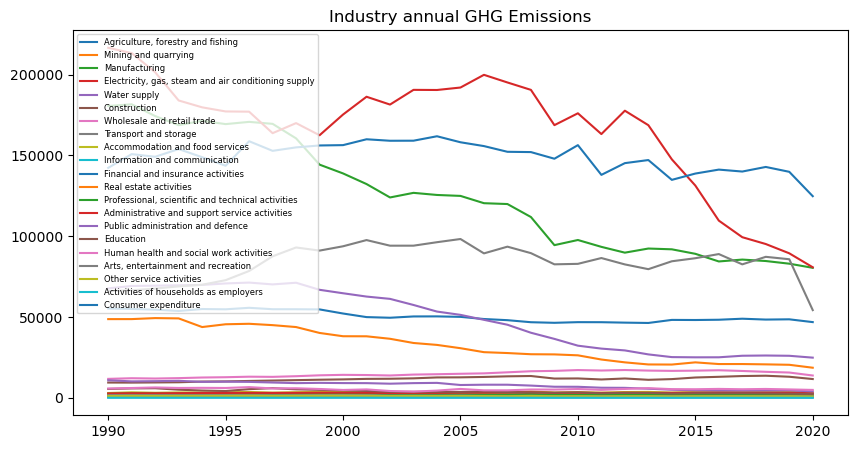

In [113]:
#graph excluding total GHG emissions
industry.plot(figsize =(10,5), title = 'Industry annual GHG Emissions');
plt.legend(loc=2, prop={'size': 6})
plt.show()

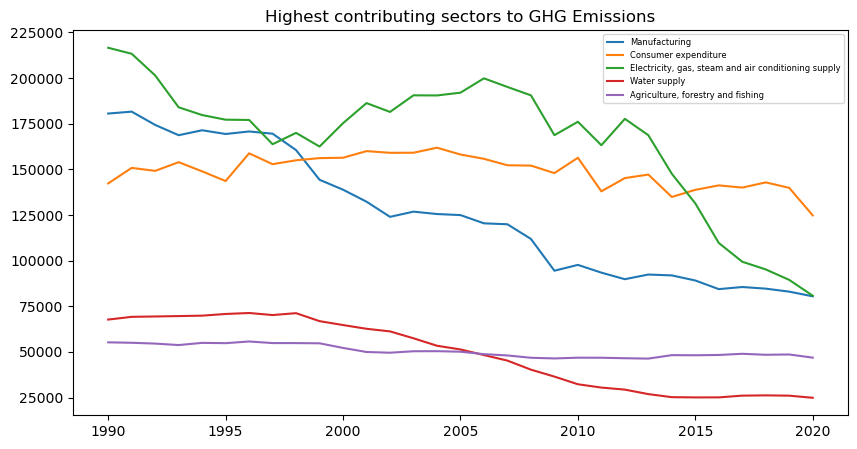

In [114]:
#Plot to see the highest contributor to GHG emission for recent years

top_industry = industry[["Manufacturing", 
                                     "Consumer expenditure",'Electricity, gas, steam and air conditioning supply', 
                          "Water supply", "Agriculture, forestry and fishing"]].copy()

top_industry.plot(figsize =(10,5), title = 'Highest contributing sectors to GHG Emissions');
plt.legend(loc=1, prop={'size': 6})
plt.show()

In [115]:
#Check the mean of all sectors

industry.mean(axis = 0).sort_values(ascending=False)

Electricity, gas, steam and air conditioning supply    166285.235484
Consumer expenditure                                   149123.248387
Manufacturing                                          125239.225806
Transport and storage                                   83626.438710
Agriculture, forestry and fishing                       50471.325806
Water supply                                            48848.290323
Mining and quarrying                                    32786.170968
Wholesale and retail trade                              14752.964516
Construction                                            11634.522581
Public administration and defence                        7737.774194
Human health and social work activities                  5382.509677
Education                                                3902.387097
Accommodation and food services                          3445.919355
Administrative and support service activities            3073.480645
Professional, scientific and techn

In [116]:
#Check the standard deviation of all sectors

industry.std(axis = 0).sort_values(ascending=False)


Electricity, gas, steam and air conditioning supply    36340.474088
Manufacturing                                          35065.150836
Water supply                                           18765.350080
Transport and storage                                  10907.974268
Mining and quarrying                                   10729.212472
Consumer expenditure                                    8831.072486
Agriculture, forestry and fishing                       3332.167983
Public administration and defence                       2182.689545
Wholesale and retail trade                              1811.612945
Construction                                            1278.783360
Education                                               1103.939929
Human health and social work activities                  641.622700
Professional, scientific and technical activities        328.578126
Arts, entertainment and recreation                       286.676005
Accommodation and food services                 

In [117]:
#calculate the percentage change for all the sectors

pct_change = ghg.pct_change()
pct_change

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply",Water supply,Construction,Wholesale and retail trade,Transport and storage,Accommodation and food services,Information and communication,...,"Professional, scientific and technical activities",Administrative and support service activities,Public administration and defence,Education,Human health and social work activities,"Arts, entertainment and recreation",Other service activities,Activities of households as employers,Consumer expenditure,Total greenhouse gas emissions
1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991,-0.004481,0.000273,0.005822,-0.015152,0.022150,-0.003389,0.033196,0.008053,0.145922,0.070497,...,0.083150,0.053179,-0.062655,0.059920,0.056497,0.072504,0.088500,0.006623,0.059811,0.011514
1992,-0.008011,0.012815,-0.040037,-0.055616,0.002910,0.010181,-0.014909,0.016091,-0.081513,-0.026917,...,-0.034837,-0.015261,0.012639,0.019280,0.057266,-0.091575,-0.048685,0.021930,-0.010882,-0.023177
1993,-0.014777,-0.003829,-0.032344,-0.086665,0.003069,0.012361,0.020649,0.020158,0.065672,0.043667,...,-0.039080,0.032974,0.020324,-0.150363,-0.049254,0.051904,0.048850,0.023605,0.031910,-0.021798
1994,0.022383,-0.108943,0.016024,-0.023106,0.003392,0.044124,0.031479,0.014450,-0.003694,0.034006,...,0.022027,0.032200,-0.060537,-0.104757,0.012279,-0.021461,0.000657,0.052411,-0.032660,-0.011937
1995,-0.003092,0.039346,-0.011904,-0.014143,0.013125,0.010858,0.014527,0.040567,0.031500,0.030630,...,0.030829,0.019156,0.011442,-0.066257,-0.013604,-0.007837,0.021097,0.031873,-0.035570,-0.005302
1996,0.016894,0.006532,0.008148,-0.000819,0.007573,0.026938,0.025507,0.078062,0.054150,0.006883,...,0.008847,0.022171,-0.012954,0.273179,0.086970,0.035515,0.041724,-0.025097,0.105694,0.033388
1997,-0.015633,-0.018298,-0.007130,-0.075097,-0.015792,0.024103,-0.007926,0.115527,-0.107338,-0.048936,...,-0.068283,-0.023988,-0.040640,0.116359,-0.123031,-0.095914,-0.080568,0.009901,-0.037475,-0.019240
1998,-0.000303,-0.026337,-0.053050,0.038005,0.014654,0.024079,0.031511,0.062641,0.073818,0.023195,...,0.028760,0.022289,-0.039380,-0.124442,0.018171,0.028975,0.040960,-0.039216,0.013997,0.006093
1999,-0.001930,-0.083270,-0.101212,-0.044155,-0.061367,0.023732,0.040761,-0.020832,0.051593,0.043343,...,0.048209,0.027579,0.018412,-0.058529,-0.075313,-0.017162,0.018787,0.030612,0.007649,-0.039517


In [118]:
#Get the overage average of all the sector percentage change

avg_pct_change = pct_change.mean(axis=0).sort_values(ascending=False)
avg_pct_change

Real estate activities                                 0.013655
Construction                                           0.007932
Accommodation and food services                        0.006132
Wholesale and retail trade                             0.005988
Administrative and support service activities          0.002522
Human health and social work activities               -0.000915
Transport and storage                                 -0.002385
Consumer expenditure                                  -0.003299
Agriculture, forestry and fishing                     -0.005310
Other service activities                              -0.006801
Financial and insurance activities                    -0.010192
Activities of households as employers                 -0.013050
Information and communication                         -0.013422
Professional, scientific and technical activities     -0.013818
Total greenhouse gas emissions                        -0.017810
Arts, entertainment and recreation      

In [119]:
#convert to a dataframe

avg_pct_change = pd.DataFrame(avg_pct_change)
avg_pct_change.columns=["Percentage change"]
avg_pct_change

,Percentage change
Real estate activities,0.013655
Construction,0.007932
Accommodation and food services,0.006132
Wholesale and retail trade,0.005988
Administrative and support service activities,0.002522
Human health and social work activities,-0.000915
Transport and storage,-0.002385
Consumer expenditure,-0.003299
"Agriculture, forestry and fishing",-0.005310
Other service activities,-0.006801


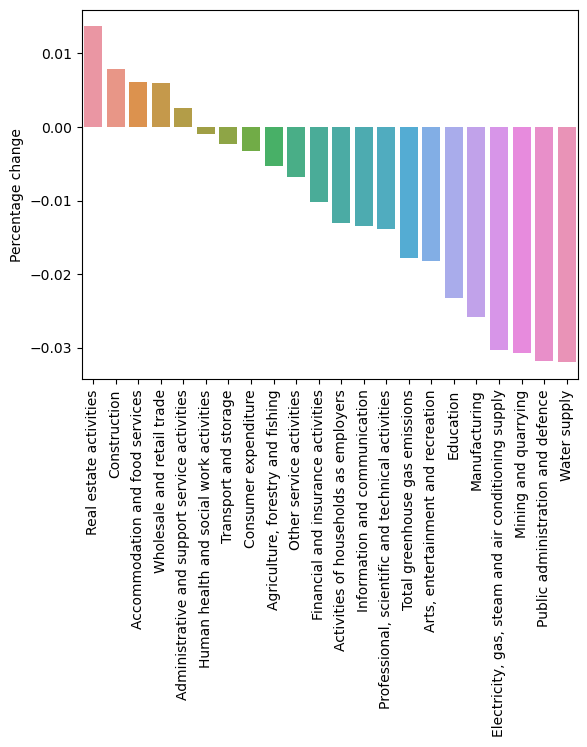

In [120]:
#Plot the average percentage change using seaborn

sns.barplot(data = avg_pct_change, x= avg_pct_change.index, y= "Percentage change");
plt.xticks(rotation=90)
plt.show()

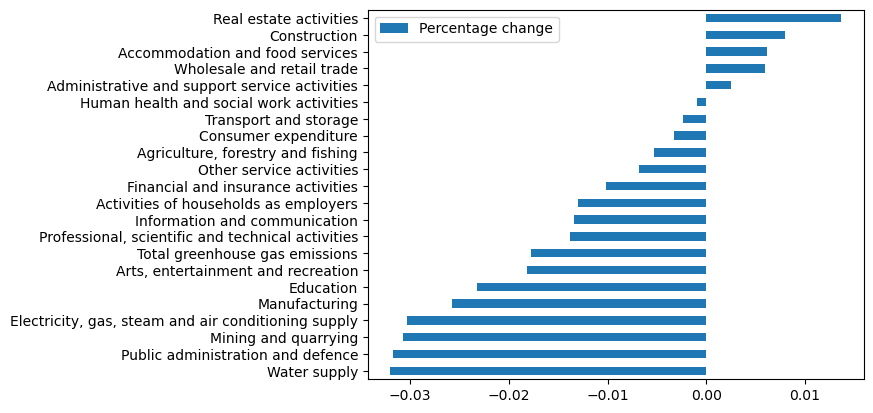

In [121]:
#Plot the average percentage change using matplotlib


avg_pct_change.sort_values("Percentage change").plot(kind="barh");

In [122]:
#create a dataframe with the years and total GHG emissions

df = pd.DataFrame(ghg["Total greenhouse gas emissions"], ghg.index)
df.index.name = "Year"
df

,Total greenhouse gas emissions
Year,
1990,833354.6
1991,842950.1
1992,823413.4
1993,805464.7
1994,795850.0
1995,791630.7
1996,818061.3
1997,802321.4
1998,807210.1


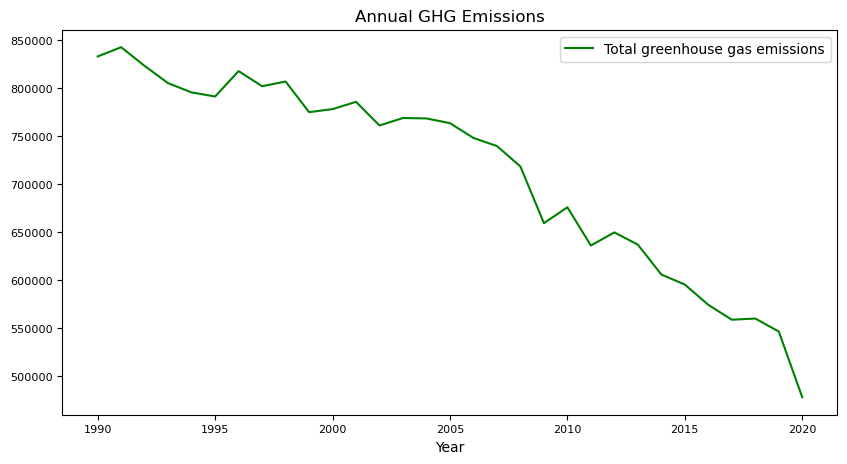

In [123]:
#create a plot with the years and total GHG emissions

df.plot(figsize =(10,5), 
         title = 'Annual GHG Emissions', 
         fontsize = 8, color= "green");

In [124]:
#Percentage change of total emissions over the years

df.pct_change().sort_values("Total greenhouse gas emissions", ascending = True)

,Total greenhouse gas emissions
Year,
2020,-0.125225
2009,-0.082107
2011,-0.058879
2014,-0.048859
1999,-0.039517
2016,-0.035505
2002,-0.031307
2008,-0.028850
2017,-0.026938


In [125]:
#Total GHG change from 1990 to 2020

a = df.iloc[0]
b= df.iloc[30]
((a-b) / a) * 100.0

Total greenhouse gas emissions    42.604325
dtype: object

### Test/Train Split

In [126]:
#Split dataset into train and test

train = ghg.loc[ghg.index <= 2018]
test = ghg.loc[ghg.index > 2018]

In [127]:
#confirm the split was properly done

train

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply",Water supply,Construction,Wholesale and retail trade,Transport and storage,Accommodation and food services,Information and communication,...,"Professional, scientific and technical activities",Administrative and support service activities,Public administration and defence,Education,Human health and social work activities,"Arts, entertainment and recreation",Other service activities,Activities of households as employers,Consumer expenditure,Total greenhouse gas emissions
Year,,,,,,,,,,,,,,,,,,,,,
1990,55231.9,48693.8,180563.3,216597.7,67701.1,9441.6,11724.4,65997.8,2968.7,1103.6,...,2499.1,2681.5,10854.7,5480.6,5743.7,1641.3,1120.9,45.3,142290.9,833354.6
1991,54984.4,48707.1,181614.5,213315.8,69200.7,9409.6,12113.6,66529.3,3401.9,1181.4,...,2706.9,2824.1,10174.6,5809.0,6068.2,1760.3,1220.1,45.6,150801.4,842950.1
1992,54543.9,49331.3,174343.2,201452.1,69402.1,9505.4,11933.0,67599.8,3124.6,1149.6,...,2612.6,2781.0,10303.2,5921.0,6415.7,1599.1,1160.7,46.6,149160.4,823413.4
1993,53737.9,49142.4,168704.3,183993.2,69615.1,9622.9,12179.4,68962.5,3329.8,1199.8,...,2510.5,2872.7,10512.6,5030.7,6099.7,1682.1,1217.4,47.7,153920.1,805464.7
1994,54940.7,43788.7,171407.7,179741.9,69851.2,10047.5,12562.8,69959.0,3317.5,1240.6,...,2565.8,2965.2,9876.2,4503.7,6174.6,1646.0,1218.2,50.2,148893.1,795850.0
1995,54770.8,45511.6,169367.2,177199.8,70768.0,10156.6,12745.3,72797.0,3422.0,1278.6,...,2644.9,3022.0,9989.2,4205.3,6090.6,1633.1,1243.9,51.8,143596.9,791630.7
1996,55696.1,45808.9,170747.2,177054.6,71303.9,10430.2,13070.4,78479.7,3607.3,1287.4,...,2668.3,3089.0,9859.8,5354.1,6620.3,1691.1,1295.8,50.5,158774.2,818061.3
1997,54825.4,44970.7,169529.7,163758.4,70177.9,10681.6,12966.8,87546.2,3220.1,1224.4,...,2486.1,3014.9,9459.1,5977.1,5805.8,1528.9,1191.4,51.0,152824.1,802321.4
1998,54808.8,43786.3,160536.1,169982.1,71206.3,10938.8,13375.4,93030.2,3457.8,1252.8,...,2557.6,3082.1,9086.6,5233.3,5911.3,1573.2,1240.2,49.0,154963.2,807210.1


In [128]:
#visiualise the test data

test

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply",Water supply,Construction,Wholesale and retail trade,Transport and storage,Accommodation and food services,Information and communication,...,"Professional, scientific and technical activities",Administrative and support service activities,Public administration and defence,Education,Human health and social work activities,"Arts, entertainment and recreation",Other service activities,Activities of households as employers,Consumer expenditure,Total greenhouse gas emissions
Year,,,,,,,,,,,,,,,,,,,,,
2019,48574.6,20436.8,82996.7,89421.3,26009.3,13036.3,15642.8,85748.4,3663.3,819.2,...,1823.3,3186.1,4594.3,2574.8,5199.5,992.5,962.6,34.0,139845.6,546779.9
2020,46843.2,18620.3,80438.6,80770.4,24857.2,11614.6,13800.9,54263.8,3172.5,703.7,...,1544.2,2821.2,3965.3,2371.9,4882.2,877.6,851.8,23.2,124766.9,478309.5


In [129]:
#Convert to numbers

train = train.to_numpy()
test = test.to_numpy()

In [130]:
#Setting our input and output arrays

X = train[:, :-1]
y = train[:, -1]

X_test= test[:, :-1]
y_test= test[:, -1]
        

In [131]:
#view

X

array([[55231.9, 48693.8, 180563.3, 216597.7, 67701.1, 9441.6, 11724.4,
        65997.8, 2968.7, 1103.6, 333, 639.8, 2499.1, 2681.5, 10854.7,
        5480.6, 5743.7, 1641.3, 1120.9, 45.3, 142290.9],
       [54984.4, 48707.1, 181614.5, 213315.8, 69200.7, 9409.6, 12113.6,
        66529.3, 3401.9, 1181.4, 364.9, 716.7, 2706.9, 2824.1, 10174.6,
        5809.0, 6068.2, 1760.3, 1220.1, 45.6, 150801.4],
       [54543.9, 49331.3, 174343.2, 201452.1, 69402.1, 9505.4, 11933.0,
        67599.8, 3124.6, 1149.6, 340.3, 687.7, 2612.6, 2781.0, 10303.2,
        5921.0, 6415.7, 1599.1, 1160.7, 46.6, 149160.4],
       [53737.9, 49142.4, 168704.3, 183993.2, 69615.1, 9622.9, 12179.4,
        68962.5, 3329.8, 1199.8, 356.9, 726.8, 2510.5, 2872.7, 10512.6,
        5030.7, 6099.7, 1682.1, 1217.4, 47.7, 153920.1],
       [54940.7, 43788.7, 171407.7, 179741.9, 69851.2, 10047.5, 12562.8,
        69959.0, 3317.5, 1240.6, 353.7, 745.7, 2565.8, 2965.2, 9876.2,
        4503.7, 6174.6, 1646.0, 1218.2, 50.2, 148893.1

In [132]:
#view

y

array([833354.6, 842950.1, 823413.4, 805464.7, 795850.0, 791630.7,
       818061.3, 802321.4, 807210.1, 775311.6, 778470.0, 786023.2,
       761414.9, 769198.0, 768757.0, 763847.3, 748397.6, 740014.3,
       718664.6, 659657.4, 676190.7, 636377.6, 650028.2, 637271.5,
       606135.1, 595689.2, 574539.0, 559062.3, 560295.1], dtype=object)

In [133]:
#create and train the model

model = xgb.XGBRegressor( n_estimators = 100, learning_rate=0.25)
model.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.25, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [134]:
#make predictions using the model

predictions = model.predict(X_test)
predictions[0:]

array([560706.1 , 564884.44], dtype=float32)

In [135]:
#view the target result 

y_test[0:]

array([546779.9, 478309.5], dtype=object)

In [136]:
#accuracy of the model on the trained data

predictions_train = model.predict(X)
r2_score(y, predictions_train)

0.9999999999977015

In [137]:
#mean squared error of the trained data

mean_squared_error(y, predictions_train)

0.017844827583818376

In [138]:
#mean absolute error of the trained data

mean_absolute_error(y, predictions_train)

0.09482758620288223

In [139]:
#accuracy of the model on the test data

print (model.score(X_test, y_test))

r2_score( y_test, predictions)

-2.2802212522739875


-2.2802212522739875

In [140]:
#mean squared error of the trained data

mean_squared_error( y_test, predictions)

3844579772.9397655

In [141]:
#mean absolute error of the trained data

mean_absolute_error( y_test, predictions)

50250.58124999999

In [142]:
#Get the next years to predict and convert into a dataframe

next_years = pd.date_range('2021', '2026', freq = 'Y')
future_years = pd.DatetimeIndex(next_years).year
future_df = pd.DataFrame(index = future_years)
future_df

""
2021
2022
2023
2024
2025


In [143]:
#Add the next years to the original data 

new_df = pd.concat([ghg,future_df])

In [144]:
#Fill every column in the new data frame with the 0.2% decrease of the previous year value

A = new_df.iloc[31]
B = new_df.iloc[30]
A.fillna(B*0.98, inplace= True)

A = new_df.iloc[32]
B = new_df.iloc[31]
A.fillna(B*0.98, inplace= True)

A = new_df.iloc[33]
B = new_df.iloc[32]
A.fillna(B*0.98, inplace= True)

A = new_df.iloc[34]
B = new_df.iloc[33]
A.fillna(B*0.98, inplace= True)

A = new_df.iloc[35]
B = new_df.iloc[34]
A.fillna(B*0.98, inplace= True)

In [145]:
#round the dataframe to 2 decimal places

new_df.astype(float).round(2)

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply",Water supply,Construction,Wholesale and retail trade,Transport and storage,Accommodation and food services,Information and communication,...,"Professional, scientific and technical activities",Administrative and support service activities,Public administration and defence,Education,Human health and social work activities,"Arts, entertainment and recreation",Other service activities,Activities of households as employers,Consumer expenditure,Total greenhouse gas emissions
1990,55231.90,48693.80,180563.30,216597.70,67701.10,9441.60,11724.40,65997.80,2968.70,1103.60,...,2499.10,2681.50,10854.70,5480.60,5743.70,1641.30,1120.90,45.30,142290.90,833354.60
1991,54984.40,48707.10,181614.50,213315.80,69200.70,9409.60,12113.60,66529.30,3401.90,1181.40,...,2706.90,2824.10,10174.60,5809.00,6068.20,1760.30,1220.10,45.60,150801.40,842950.10
1992,54543.90,49331.30,174343.20,201452.10,69402.10,9505.40,11933.00,67599.80,3124.60,1149.60,...,2612.60,2781.00,10303.20,5921.00,6415.70,1599.10,1160.70,46.60,149160.40,823413.40
1993,53737.90,49142.40,168704.30,183993.20,69615.10,9622.90,12179.40,68962.50,3329.80,1199.80,...,2510.50,2872.70,10512.60,5030.70,6099.70,1682.10,1217.40,47.70,153920.10,805464.70
1994,54940.70,43788.70,171407.70,179741.90,69851.20,10047.50,12562.80,69959.00,3317.50,1240.60,...,2565.80,2965.20,9876.20,4503.70,6174.60,1646.00,1218.20,50.20,148893.10,795850.00
1995,54770.80,45511.60,169367.20,177199.80,70768.00,10156.60,12745.30,72797.00,3422.00,1278.60,...,2644.90,3022.00,9989.20,4205.30,6090.60,1633.10,1243.90,51.80,143596.90,791630.70
1996,55696.10,45808.90,170747.20,177054.60,71303.90,10430.20,13070.40,78479.70,3607.30,1287.40,...,2668.30,3089.00,9859.80,5354.10,6620.30,1691.10,1295.80,50.50,158774.20,818061.30
1997,54825.40,44970.70,169529.70,163758.40,70177.90,10681.60,12966.80,87546.20,3220.10,1224.40,...,2486.10,3014.90,9459.10,5977.10,5805.80,1528.90,1191.40,51.00,152824.10,802321.40
1998,54808.80,43786.30,160536.10,169982.10,71206.30,10938.80,13375.40,93030.20,3457.80,1252.80,...,2557.60,3082.10,9086.60,5233.30,5911.30,1573.20,1240.20,49.00,154963.20,807210.10
1999,54703.00,40140.20,144288.00,162476.60,66836.60,11198.40,13920.60,91092.20,3636.20,1307.10,...,2680.90,3167.10,9253.90,4927.00,5466.10,1546.20,1263.50,50.50,156148.50,775311.60


In [146]:
#select the new years data 

test2 = new_df.loc[new_df.index >= 2021]
test2 

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply",Water supply,Construction,Wholesale and retail trade,Transport and storage,Accommodation and food services,Information and communication,...,"Professional, scientific and technical activities",Administrative and support service activities,Public administration and defence,Education,Human health and social work activities,"Arts, entertainment and recreation",Other service activities,Activities of households as employers,Consumer expenditure,Total greenhouse gas emissions
2021,45906.336,18247.894,78829.828,79154.992,24360.056,11382.308,13524.882,53178.524,3109.05,689.626,...,1513.316,2764.776,3885.994,2324.462,4784.556,860.048,834.764,22.736,122271.562,468743.31
2022,44988.20928,17882.93612,77253.23144,77571.89216,23872.85488,11154.66184,13254.38436,52114.95352,3046.869,675.83348,...,1483.04968,2709.48048,3808.27412,2277.97276,4688.86488,842.84704,818.06872,22.28128,119826.13076,459368.4438
2023,44088.445094,17525.277398,75708.166811,76020.454317,23395.397782,10931.568603,12989.296673,51072.65445,2985.93162,662.31681,...,1453.388686,2655.29087,3732.108638,2232.413305,4595.087582,825.990099,801.707346,21.835654,117429.608145,450181.074924
2024,43206.676193,17174.77185,74194.003475,74500.04523,22927.489827,10712.937231,12729.510739,50051.201361,2926.212988,649.070474,...,1424.320913,2602.185053,3657.466465,2187.765039,4503.185831,809.470297,785.673199,21.398941,115081.015982,441177.453426
2025,42342.542669,16831.276413,72710.123405,73010.044326,22468.94003,10498.678487,12474.920525,49050.177333,2867.688728,636.089065,...,1395.834494,2550.141352,3584.317136,2144.009738,4413.122114,793.280891,769.959735,20.970962,112779.395662,432353.904357


In [147]:
#Convert to numbers and set input and output data

test2= test2.to_numpy()
X_test2= test2[:, :-1]
y_test2= test2[:, -1]

In [148]:
#view the input data

X_test2

array([[45906.335999999996, 18247.894, 78829.82800000001, 79154.992,
        24360.056, 11382.308, 13524.882, 53178.524000000005,
        3109.0499999999997, 689.626, 225.59599999999998,
        872.0039999999999, 1513.316, 2764.776, 3885.994, 2324.462,
        4784.556, 860.048, 834.7639999999999, 22.736, 122271.56199999999],
       [44988.209279999995, 17882.93612, 77253.23144, 77571.89216,
        23872.85488, 11154.66184, 13254.38436, 52114.95352,
        3046.8689999999997, 675.83348, 221.08407999999997,
        854.5639199999999, 1483.04968, 2709.4804799999997, 3808.27412,
        2277.97276, 4688.864879999999, 842.84704, 818.0687199999999,
        22.28128, 119826.13075999999],
       [44088.4450944, 17525.2773976, 75708.1668112, 76020.4543168,
        23395.3977824, 10931.568603200001, 12989.2966728, 51072.6544496,
        2985.93162, 662.3168104, 216.66239839999997, 837.4726416,
        1453.3886864, 2655.2908703999997, 3732.1086376, 2232.4133048,
        4595.0875823999995, 8

In [149]:
#view the output data

y_test2

array([468743.31, 459368.4438, 450181.074924, 441177.45342552,
       432353.90435700957], dtype=object)

In [150]:
#run the new data into the model

GHG_forecast= model.predict(X_test2)
GHG_forecast

array([564859.75, 564859.75, 564858.9 , 564858.9 , 564850.1 ],
      dtype=float32)

In [151]:
#create a data frame of the forecast

predictions_df = pd.DataFrame({'future_years': future_years, 'GHG_forecast': GHG_forecast}, 
                              columns=['future_years', 'GHG_forecast'])
predictions_df

,future_years,GHG_forecast
0,2021,564859.750
1,2022,564859.750
2,2023,564858.875
3,2024,564858.875
4,2025,564850.125


In [152]:
#Make the years the index

predictions_df = predictions_df.set_index("future_years")
predictions_df

,GHG_forecast
future_years,
2021,564859.750
2022,564859.750
2023,564858.875
2024,564858.875
2025,564850.125


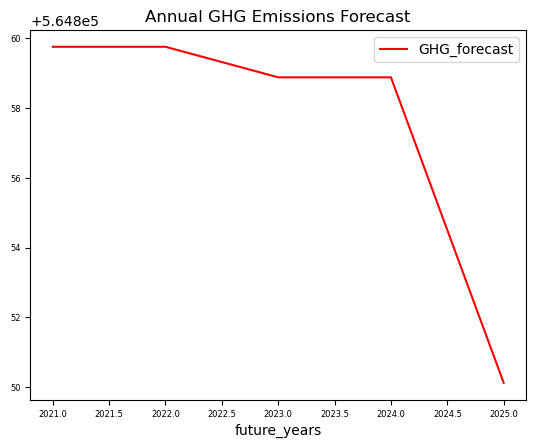

In [153]:
#Plot a graph with the GHG Emissions Forecast result

predictions_df.plot( title = 'Annual GHG Emissions Forecast', 
         fontsize = 6, color= "red");